In [0]:
import keras
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import MaxPooling2D, Conv2D
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
ls

'My Drive'/


In [0]:
cd My\ Drive

/gdrive/My Drive


In [0]:
cd Colab\ Notebooks

/gdrive/My Drive/Colab Notebooks


In [0]:
cd Multi_Label_dataset/

/gdrive/My Drive/Colab Notebooks/Multi_Label_dataset


In [0]:
ls

Images/  train.csv  Untitled0.ipynb


In [0]:
train = pd.read_csv('train.csv')
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [0]:
train_image = []
for i in tqdm(range(3000)):
  img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size = (400,400,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)

100%|██████████| 3000/3000 [17:23<00:00,  2.62it/s]


In [0]:
train_image = np.array(train_image)

In [0]:
train_image.shape

(3000, 400, 400, 3)

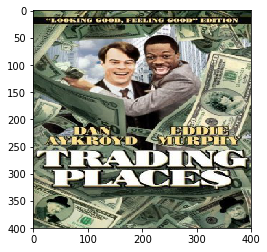

In [0]:
plt.imshow(train_image[2])

In [0]:
train['Genre'][2]

"['Comedy']"

In [0]:
y = np.array(train.drop(['Id', 'Genre'],axis = 1))

In [0]:
y.shape

(7254, 25)

In [0]:
y = y[0:3000,:]

In [0]:
X_train,X_test,y_train,y_test = train_test_split(train_image,y, test_size = 0.1,random_state = 42)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu',input_shape = (400,400,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(25,activation = 'sigmoid'))

W0810 18:46:28.026622 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 18:46:28.086642 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 18:46:28.104606 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 18:46:28.160272 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 18:46:28.163504 139621567825792 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [0]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0810 18:46:28.429592 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 18:46:28.458432 139621567825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 18:46:28.465154 139621567825792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train,y_train, epochs = 10, validation_data = (X_test,y_test), batch_size = 64)

Train on 2700 samples, validate on 300 samples
Epoch 1/10
2700/2700 [==============================] - 491s 182ms/step - loss: 0.3726 - acc: 0.8415 - val_loss: 0.2846 - val_acc: 0.9061
Epoch 2/10
2700/2700 [==============================] - 498s 185ms/step - loss: 0.2651 - acc: 0.9027 - val_loss: 0.2539 - val_acc: 0.9061
Epoch 3/10
2700/2700 [==============================] - 496s 184ms/step - loss: 0.2547 - acc: 0.9047 - val_loss: 0.2435 - val_acc: 0.9061
Epoch 4/10
2700/2700 [==============================] - 497s 184ms/step - loss: 0.2475 - acc: 0.9074 - val_loss: 0.2504 - val_acc: 0.9061
Epoch 5/10
2700/2700 [==============================] - 496s 184ms/step - loss: 0.2427 - acc: 0.9084 - val_loss: 0.2527 - val_acc: 0.9061
Epoch 6/10
2700/2700 [==============================] - 496s 184ms/step - loss: 0.2400 - acc: 0.9082 - val_loss: 0.2424 - val_acc: 0.9061
Epoch 7/10
2700/2700 [==============================] - 494s 183ms/step - loss: 0.2388 - acc: 0.9095 - val_loss: 0.2561 - val

In [0]:
model_name = "Multiple_label_recognition.h5"
model.save(model_name,overwrite = True)

In [0]:
ls

Images/                     Multiple_label_recognition.h5  Untitled0.ipynb
Multiple_label_recognition  train.csv


In [0]:
img = image.load_img('GOT.jpg', target_size = (400,400,3))
img = image.img_to_array(img)
img = img/255

Drama(0.602)
Thriller(0.28)
Action(0.277)


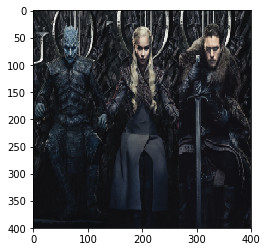

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print("{}".format(classes[top_3[i]]) + "({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
img = image.load_img('avengers.jpeg', target_size = (400,400,3))
img = image.img_to_array(img)
img = img/255

Drama(0.594)
Action(0.281)
Crime(0.28)


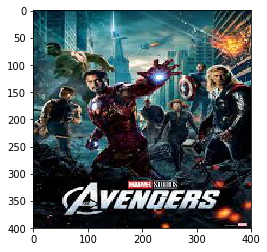

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print("{}".format(classes[top_3[i]])+ "({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [0]:
top_3

array([7, 0, 5])

In [0]:
proba[0][7]

0.59386516

In [0]:
proba[0]

array([2.81081051e-01, 6.06808066e-02, 4.51466441e-03, 3.79562080e-02,
       1.38227999e-01, 2.80207127e-01, 1.52665973e-02, 5.93865156e-01,
       1.02279484e-02, 4.78357673e-02, 2.60320604e-02, 2.34318852e-01,
       3.53531241e-02, 5.76102734e-03, 9.72145200e-02, 2.71946192e-04,
       2.56359577e-04, 1.04308128e-04, 1.03954226e-01, 1.04386806e-01,
       2.37584114e-04, 1.18433237e-02, 2.79326677e-01, 1.12656057e-02,
       4.10545245e-03], dtype=float32)

In [0]:
img = image.load_img('golmal.jpeg', target_size = (400,400,3))
img = image.img_to_array(img)
img = img/255

Drama(0.588)
Action(0.294)
Thriller(0.29)


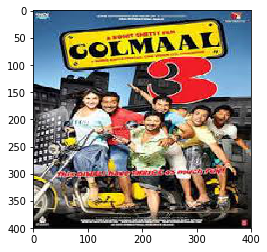

In [0]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print("{}".format(classes[top_3[i]]) + "({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)